In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')




In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
df

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,0,25.19,6.60,140,0
1,1,20.00,0,0,0,27.32,6.60,85,0
2,1,44.00,0,0,0,19.31,6.50,200,1
3,1,32.00,0,0,0,27.32,5.00,100,0
4,1,53.00,0,0,0,27.32,6.10,85,0
...,...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220,1
44374,0,43.00,0,0,1,31.35,3.50,100,0
44375,0,44.00,0,0,1,27.32,5.00,158,0
44376,0,13.00,0,0,1,21.81,4.80,90,0


In [9]:
duplicate_rows_data = df[df.duplicated()] 

print('duplicated number of rows',duplicate_rows_data.shape)

duplicated number of rows (0, 9)


In [10]:
df = df.drop_duplicates()

In [12]:
#loop on each column && print distinct values count

for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f'{column} :  {num_distinct_values} distinct values') 


gender :  2 distinct values
age :  101 distinct values
hypertension :  2 distinct values
heart_disease :  2 distinct values
smoking :  2 distinct values
bmi :  3700 distinct values
HbA1c_level :  18 distinct values
blood_glucose_level :  18 distinct values
diabetes :  2 distinct values


In [13]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking                0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


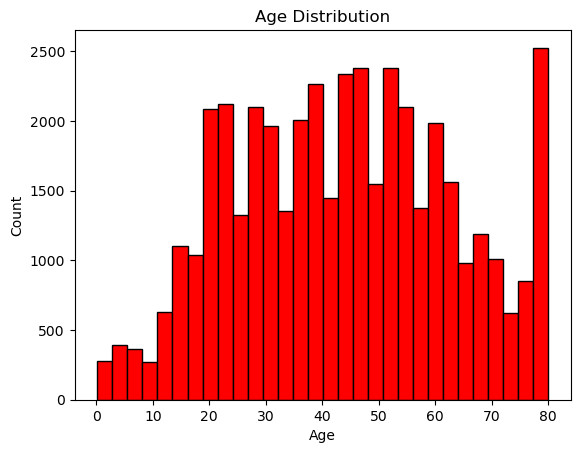

In [24]:
#histogram for age :
plt.hist(df['age'],bins=30,color='red',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

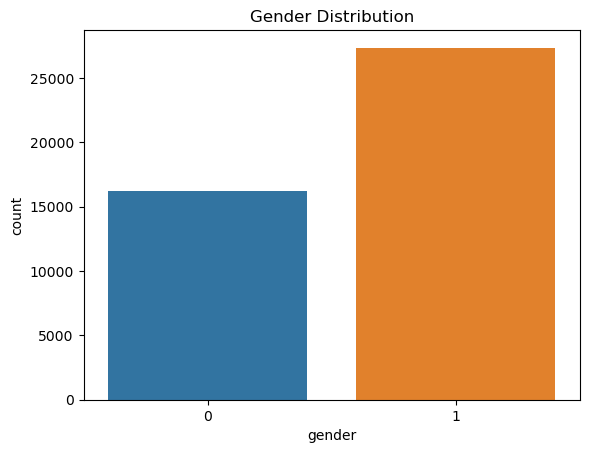

In [25]:
sns.countplot(x='gender',data=df)
plt.title('Gender Distribution')
plt.show()

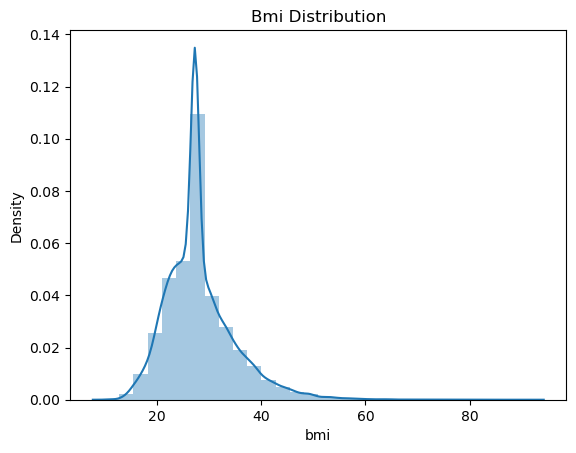

In [31]:
# Bmi distribution
sns.distplot(df['bmi'],bins=30)
plt.title('Bmi Distribution')
plt.show()

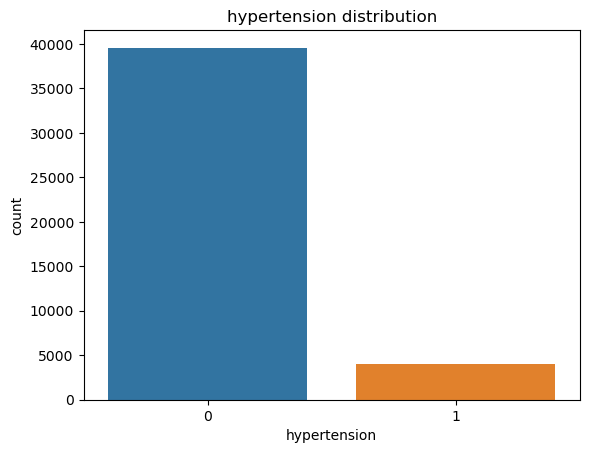

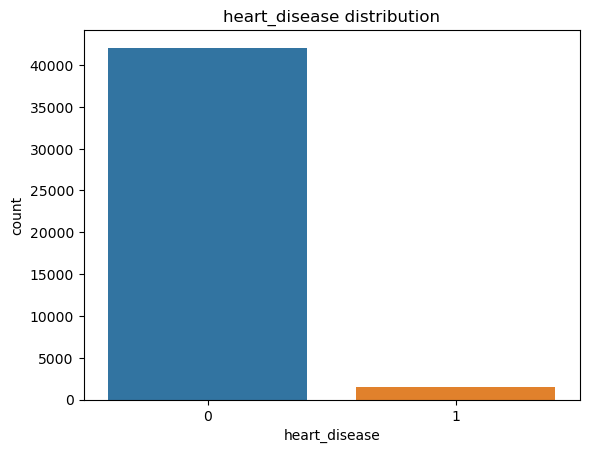

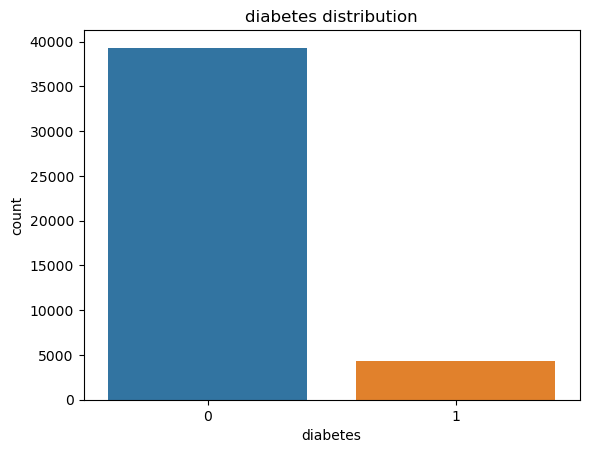

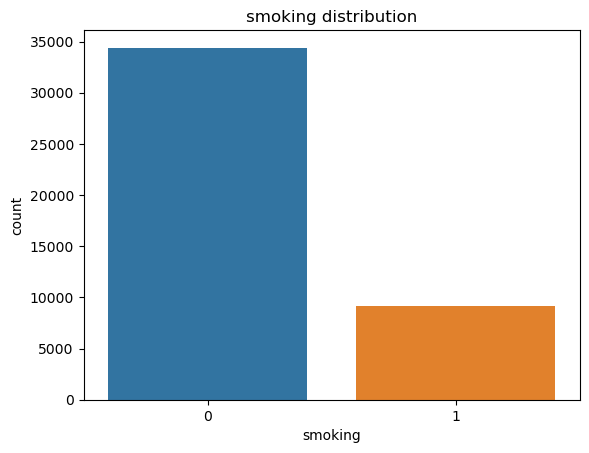

In [33]:
for col in ['hypertension','heart_disease','diabetes','smoking']:
    sns.countplot(x=col,data=df)
    plt.title(f'{col} distribution')
    plt.show()


Text(0.5, 1.0, 'gender vs diabetes')

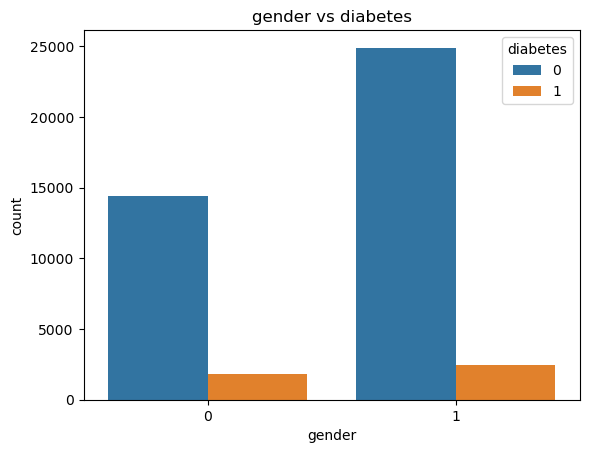

In [35]:
sns.countplot(x='gender',hue='diabetes',data=df)
plt.title('gender vs diabetes')

Text(0.5, 1.0, 'age vs bmi ')

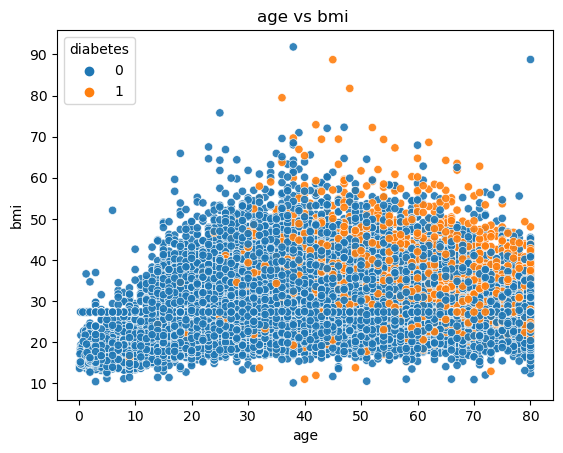

In [41]:
sns.scatterplot(x='age',y='bmi',hue='diabetes',data=df,alpha=0.9)
plt.title("age vs bmi ")

In [42]:
#split data into features and target variables 

x = df.drop('diabetes',axis=1) 

In [43]:
x

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level
0,1,80.00,0,1,0,25.19,6.60,140
1,1,20.00,0,0,0,27.32,6.60,85
2,1,44.00,0,0,0,19.31,6.50,200
3,1,32.00,0,0,0,27.32,5.00,100
4,1,53.00,0,0,0,27.32,6.10,85
...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220
44374,0,43.00,0,0,1,31.35,3.50,100
44375,0,44.00,0,0,1,27.32,5.00,158
44376,0,13.00,0,0,1,21.81,4.80,90


In [44]:
y= df['diabetes']

In [45]:
y


0        0
1        0
2        1
3        0
4        0
        ..
44373    1
44374    0
44375    0
44376    0
44377    0
Name: diabetes, Length: 43592, dtype: int64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [47]:
rfc = RandomForestClassifier(n_estimators=200)

In [49]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [53]:
rfc_train = rfc.predict(x_train)
print('Accurancy Score : Training Data ::=++>> ',accuracy_score(rfc_train,y_train))


Accurancy Score : Training Data ::=++>>  0.9993404639692599


In [68]:
Prediction =rfc.predict(x_test)
print('Accurancy Score : Testing Data ::=++>> ',accuracy_score(Prediction,y_test))

Accurancy Score : Testing Data ::=++>>  0.9663952288106434


In [69]:
print(confusion_matrix(Prediction,y_test))

[[7842  263]
 [  30  584]]


In [73]:
print(classification_report(Prediction,y_test))

TypeError: 'str' object is not callable